In [15]:
import numpy as np

cvx = np.load('var_obstacles/dataset-ff-v05-cvx.npz')
scp = np.load('var_obstacles/dataset-ff-v05-scp.npz')
par = np.load('var_obstacles/dataset-ff-v05-param.npz')

cvx2 = np.load('var_obstacles/dataset-ff-v05-cvx01.npz')
scp2 = np.load('var_obstacles/dataset-ff-v05-scp01.npz')
par2 = np.load('var_obstacles/dataset-ff-v05-param01.npz')


In [41]:
par2['obs_position']
par2['obs_radius']

def generate_perfect_observations(positions, radii):
    """
    Generate a flat array containing position coordinates followed by radius for each observation.

    Args:
    positions (numpy.ndarray): An array of shape (n, 2) where n is the number of observations, and each element is an (x, y) tuple.
    radii (numpy.ndarray): An array of shape (n,) containing radii corresponding to each position.

    Returns:
    numpy.ndarray: A flat array of shape (3n,) where each group of three elements contains the x coordinate, y coordinate, and radius for each observation.
    """
    n_obs = len(radii)
    out = np.empty(shape=(3 * n_obs), dtype=float)
    out[0::3] = positions[:, 0]  # x coordinates
    out[1::3] = positions[:, 1]  # y coordinates
    out[2::3] = radii  # radii

    return out

N_data = len(par2['obs_radius'])
observations_scp2 = np.zeros((N_data, 100, 12))
for i in range(N_data):
    observations_scp2[i, :, :] = generate_perfect_observations(par2['obs_position'][i], par2['obs_radius'][i])
    

KeyboardInterrupt: 

In [68]:
# target_state2 = par2['target_state'][:150000]
# time2 = par2['time'][:150000]
# dtime2 = par2['dtime'][:150000]
# n_obs2 = par2['n_obs'][:150000]
# obs_position2 = par2['obs_position'][:150000]
# obs_radius2 = par2['obs_radius'][:150000]
# states_cvx2 = cvx2['states_cvx'][:150000]
observations_cvx2 = observations_scp2[:150000]
# actions_cvx2 = cvx2['actions_cvx'][:150000]
# actions_t_cvx2 = cvx2['actions_t_cvx'][:150000]
# states_scp2 = scp2['states_scp'][:150000]
observations_scp2 = observations_scp2[:150000]
# actions_scp2 = scp2['actions_scp'][:150000]
# actions_t_scp2 = scp2['actions_t_scp'][:150000]

In [70]:
i_unfeas = scp2['i_unfeas']

# xxx = np.zeros((130000, 10))
# xxx = np.delete(xxx, i_unfeas, axis=0)

# xxx.shape, 150000 - len(i_unfeas)
# i_unfeas[-1]

# states_cvx2 = np.delete(states_cvx2, i_unfeas, axis=0)
# actions_cvx2 = np.delete(actions_cvx2, i_unfeas, axis=0)
# actions_t_cvx2 = np.delete(actions_t_cvx2, i_unfeas, axis=0)

# states_scp2 = np.delete(states_scp2, i_unfeas, axis=0)
# actions_scp2 = np.delete(actions_scp2, i_unfeas, axis=0)
# actions_t_scp2 = np.delete(actions_t_scp2, i_unfeas, axis=0)

# target_state2 = np.delete(target_state2, i_unfeas, axis=0)
# dtime2 = np.delete(dtime2, i_unfeas, axis=0)
# time2 = np.delete(time2, i_unfeas, axis=0)

# n_obs2 = np.delete(n_obs2, i_unfeas, axis=0)
# obs_position2 = np.delete(obs_position2, i_unfeas, axis=0)
# obs_radius2 = np.delete(obs_radius2, i_unfeas, axis=0)
observations_cvx2 = np.delete(observations_cvx2, i_unfeas, axis=0)
observations_scp2 = np.delete(observations_scp2, i_unfeas, axis=0)

In [72]:
observations_scp2.shape

(129573, 100, 12)

In [3]:
target_state = par['target_state']
time = par['time']
dtime = par['dtime']
n_obs = par['n_obs']
obs_position = par['obs_position']
obs_radius = par['obs_radius']
states_cvx = cvx['states_cvx']
observations_cvx = cvx['observations_cvx']
actions_cvx = cvx['actions_cvx']
actions_t_cvx = cvx['actions_t_cvx']
states_scp = scp['states_scp']
observations_scp = scp['observations_scp']
actions_scp = scp['actions_scp']
actions_t_scp = scp['actions_t_scp']

In [5]:
target_state2 = par2['target_state']
time2 = par2['time']
dtime2 = par2['dtime']
n_obs2 = par2['n_obs']
obs_position2 = par2['obs_position']
obs_radius2 = par2['obs_radius']
states_cvx2 = cvx2['states_cvx']
observations_cvx2 = cvx2['observations_cvx']
actions_cvx2 = cvx2['actions_cvx']
actions_t_cvx2 = cvx2['actions_t_cvx']
states_scp2 = scp2['states_scp']
observations_scp2 = scp2['observations_scp']
actions_scp2 = scp2['actions_scp']
actions_t_scp2 = scp2['actions_t_scp']

KeyError: 'observations_cvx is not a file in the archive'

In [4]:
import os
import sys
import argparse

root_folder = os.path.abspath(os.getcwd())
dataset_scenario = 'var_obstacles'
data_dir_torch = root_folder + '/' + dataset_scenario + '/torch/v05'
perm = np.load(data_dir_torch + '/permutation.npy')
n = int(0.9 * np.concatenate((states_scp, states_cvx), axis=0).shape[0])
m = int(1 * states_cvx.shape[0])

n, m

perm.shape, n, m 

((733350,), 660015, 366675)

In [5]:
perm[m + 253001]

456820

In [6]:
actions_cvx.shape[0]
perm_obs_pos = np.concatenate((observations_scp, observations_cvx), axis=0)[perm]
perm_states = np.concatenate((states_scp, states_cvx), axis=0)[perm]

perm_obs_pos = np.concatenate((observations_scp, observations_cvx), axis=0)
perm_states = np.concatenate((states_scp, states_cvx), axis=0)

# perm_states.shape

# perm_obs_pos[253001][0][:]

# tensor([[1.0165, 1.6682, 0.1321],
#         [2.4798, 2.2477, 0.1644],
#         [2.2288, 1.4136, 0.1116],
#         [1.8797, 0.3592, 0.1161]], dtype=torch.float64)

In [7]:
states_len = states_cvx.shape[0]
# id = 253001
id = 125
reshaped_observation = perm_obs_pos[id, 0, :3 * 4].reshape(-1, 3)
# original_id = perm[id]
# original_id, original_id - states_len


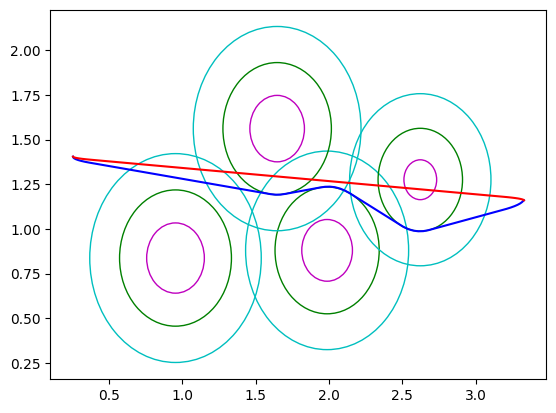

In [8]:
original_id = id
# sss = perm_states[id, :, :2]
ss2 = states_cvx[original_id, :, :2] if original_id < states_len else states_cvx[original_id - states_len, :, :2]
sss = states_scp[original_id, :, :2] if original_id < states_len else states_scp[original_id - states_len, :, :2]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

r0 = .15
safety_margin = 1.1

plt.plot(sss[:, 0], sss[:, 1], 'b')
plt.plot(ss2[:, 0], ss2[:, 1], 'r')
for x, y, r in reshaped_observation:
    new_r = (r + r0) * safety_margin
    circle = plt.Circle((x, y), new_r, edgecolor='g', facecolor='none')  # You can customize the colors
    ax.add_patch(circle)
    new_r = (new_r + r0) * safety_margin
    circle = plt.Circle((x, y), new_r, edgecolor='c', facecolor='none')  # You can customize the colors
    ax.add_patch(circle)
    circle = plt.Circle((x, y), r, edgecolor='m', facecolor='none')  # You can customize the colors
    ax.add_patch(circle)
plt.show()

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from dynamics.freeflyer_obs import compute_constraint_to_go, compute_reward_to_go

rtgs_scp = compute_reward_to_go(actions_scp)
rtgs_cvx = compute_reward_to_go(actions_cvx)

obs_radius_safe = (obs_radius + r0) * safety_margin
ctgs_scp = compute_constraint_to_go(states_scp, obs_position, obs_radius_safe, n_obs)
ctgs_cvx = compute_constraint_to_go(states_cvx, obs_position, obs_radius_safe, n_obs)


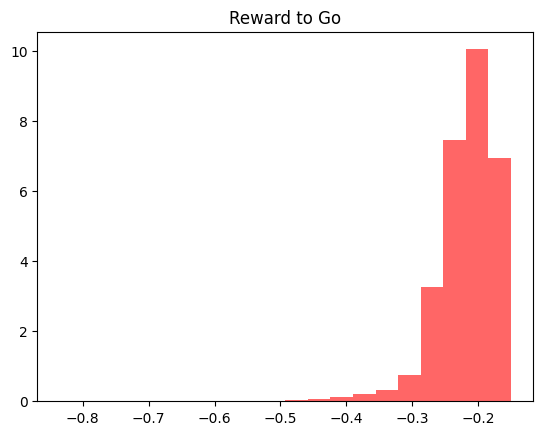

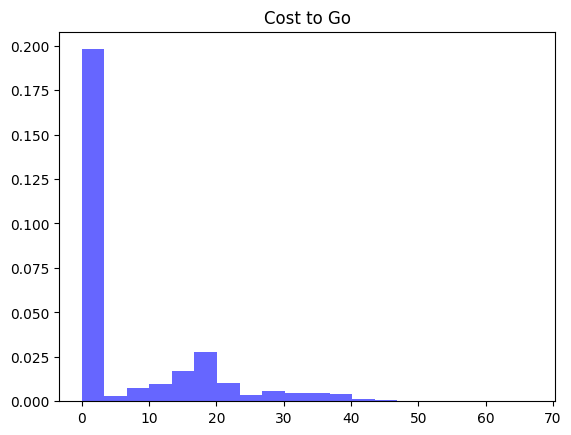

In [17]:
rtgs_all = np.concatenate((rtgs_scp, rtgs_cvx), axis=0)
ctgs_all = np.concatenate((ctgs_scp, ctgs_cvx), axis=0)

plt.figure()
# plt.hist(ctgs_all[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
plt.hist(rtgs_all[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs')
plt.title("Reward to Go")
plt.show()

plt.figure()
plt.hist(ctgs_all[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
# plt.hist(rtgs_all[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs')
plt.title("Cost to Go")
plt.show()


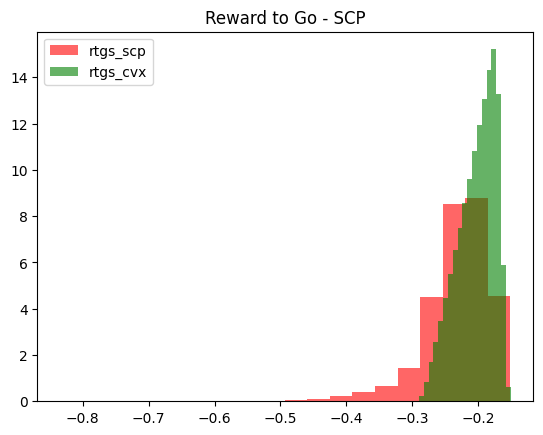

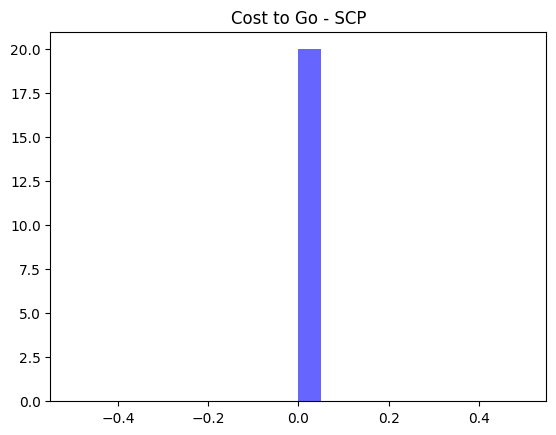

In [18]:
rtgs_all = np.concatenate((rtgs_scp, rtgs_cvx), axis=0)
ctgs_all = np.concatenate((ctgs_scp, ctgs_cvx), axis=0)

plt.figure()
# plt.hist(ctgs_all[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
plt.hist(rtgs_scp[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs_scp')
plt.hist(rtgs_cvx[:, 0], bins=20, density=True, alpha=.6, color='g', label='rtgs_cvx')
plt.title("Reward to Go - SCP")
plt.legend()
plt.show()

plt.figure()
plt.hist(ctgs_scp[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
# plt.hist(rtgs_all[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs')
plt.title("Cost to Go - SCP")
plt.show()


In [15]:
from dynamics.freeflyer_obs import FreeflyerModel, sample_init_target, ocp_no_obstacle_avoidance, \
    ocp_obstacle_avoidance, generate_random_obstacles, generate_perfect_observations

id = 1959
ff_model = FreeflyerModel()
# ocp_obstacle_avoidance(ff_model, init_state, target_state[id], copy.deepcopy(obs))
compute_constraint_to_go(np.expand_dims(states_scp[id], axis=0), np.expand_dims(obs_position[id], axis=0), np.expand_dims(obs_radius_safe[id], axis=0), np.expand_dims(n_obs[id], axis=0))
# np.linalg.norm(states_scp[id][None, :, :2] - obs_position[id][:, None, :], axis=2) - obs_radius_safe[id][:, None]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [17]:
for i in range(ctgs_scp[:, 0].shape[0]):
    if not ctgs_scp[i, 0] == 0:
        print(i, ctgs_scp[i, 0])

113 1.0
125 2.0
232 1.0
300 2.0
419 1.0
628 1.0
791 2.0
949 1.0
1056 1.0
1058 2.0
1086 1.0
1097 1.0
1127 1.0
1131 1.0
1204 1.0
1315 2.0
1450 1.0
1476 2.0
1569 1.0
1588 1.0
1630 2.0
1724 2.0
1797 1.0
1886 1.0
1959 2.0
2049 2.0
2098 1.0
2332 1.0
2488 1.0
2495 2.0
2613 1.0
2853 1.0
3007 3.0
3209 2.0
3268 1.0
3359 2.0
3370 2.0
3769 1.0
3829 2.0
3923 1.0
4026 2.0
4037 2.0
4087 1.0
4276 1.0
4519 2.0
4535 2.0
4550 1.0
4576 1.0
4696 1.0
4719 2.0
4742 1.0
4766 2.0
4857 2.0
5044 1.0
5047 1.0
5103 1.0
5170 1.0
5183 2.0
5353 1.0
5481 1.0
5626 1.0
5761 2.0
5861 2.0
6030 1.0
6240 2.0
6254 2.0
6257 2.0
6430 2.0
6548 2.0
6566 1.0
6570 1.0
6736 1.0
6775 1.0
6904 1.0
7190 3.0
7214 1.0
7326 2.0
7470 2.0
7718 2.0
7898 1.0
7943 4.0
8043 1.0
8088 1.0
8146 2.0
8148 1.0
8194 2.0
8293 2.0
8350 2.0
8402 2.0
8418 2.0
8696 2.0
8770 3.0
8858 2.0
9052 2.0
9098 2.0
9103 2.0
9151 2.0
9173 1.0
9360 1.0
9388 1.0
9432 2.0
9445 1.0
9456 3.0
9616 2.0
9662 2.0
9663 2.0
9680 2.0
9830 1.0
9863 2.0
9976 1.0
10494 1.0
10586 2.

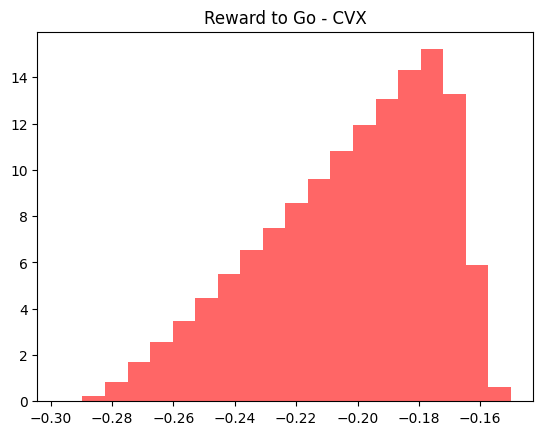

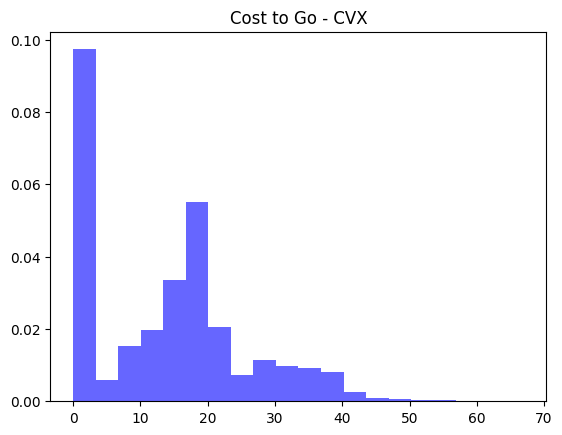

In [18]:
rtgs_all = np.concatenate((rtgs_scp, rtgs_cvx), axis=0)
ctgs_all = np.concatenate((ctgs_scp, ctgs_cvx), axis=0)

plt.figure()
# plt.hist(ctgs_all[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
plt.hist(rtgs_cvx[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs')
plt.title("Reward to Go - CVX")
plt.show()

plt.figure()
plt.hist(ctgs_cvx[:, 0], bins=20, density=True, alpha=.6, color='b', label='ctgs')
# plt.hist(rtgs_all[:, 0], bins=20, density=True, alpha=.6, color='r', label='rtgs')
plt.title("Cost to Go - CVX")
plt.show()


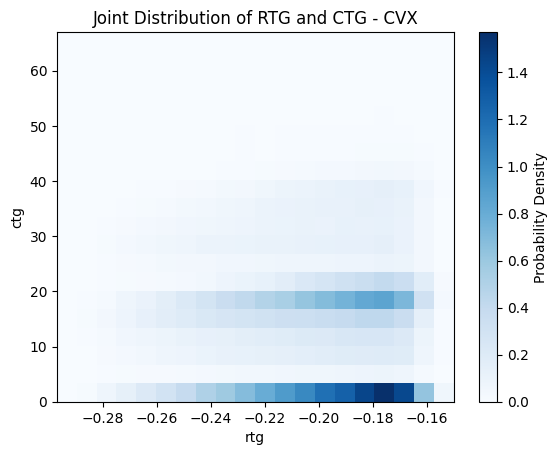

In [19]:
plt.hist2d(rtgs_cvx[:, 0], ctgs_cvx[:, 0], bins=20, density=True, cmap='Blues')

# Adding a colorbar
plt.colorbar(label='Probability Density')

# Adding labels and title
plt.xlabel('rtg')
plt.ylabel('ctg')
plt.title('Joint Distribution of RTG and CTG - CVX')

# Show the plot
plt.show()

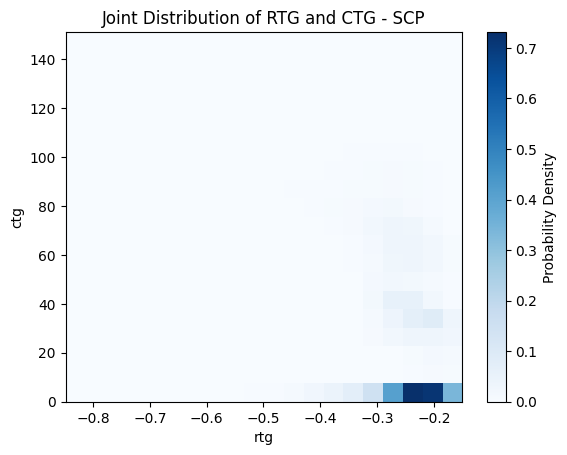

In [129]:
plt.hist2d(rtgs_scp[:, 0], ctgs_scp[:, 0], bins=20, density=True, cmap='Blues')

# Adding a colorbar
plt.colorbar(label='Probability Density')

# Adding labels and title
plt.xlabel('rtg')
plt.ylabel('ctg')
plt.title('Joint Distribution of RTG and CTG - SCP')

# Show the plot
plt.show()

In [ ]:
plt.hist2d(rtgs_all[:, 0], ctgs_all[:, 0], bins=20, density=True, cmap='Blues')

# Adding a colorbar
plt.colorbar(label='Probability Density')

# Adding labels and title
plt.xlabel('rtg')
plt.ylabel('ctg')
plt.title('Joint Distribution of RTG and CTG')

# Show the plot
plt.show()

In [44]:
j = 0
for i in range(actions_cvx.shape[0]):
    j += 1
    observations_cvx[i, :, 3 * n_obs[i]:] = 0
    observations_scp[i, :, 3 * n_obs[i]:] = 0

In [73]:
target_state_out = np.concatenate((target_state, target_state2), axis=0)
time_out = np.concatenate((time, time2), axis=0)
dtime_out = np.concatenate((dtime, dtime2), axis=0)
n_obs_out = np.concatenate((n_obs, n_obs2), axis=0)
obs_position_out = np.concatenate((obs_position, obs_position2), axis=0)
obs_radius_out = np.concatenate((obs_radius, obs_radius2), axis=0)
states_cvx_out = np.concatenate((states_cvx, states_cvx2), axis=0)
observations_cvx_out = np.concatenate((observations_cvx, observations_cvx2), axis=0)
actions_cvx_out = np.concatenate((actions_cvx, actions_cvx2), axis=0)
actions_t_cvx_out = np.concatenate((actions_t_cvx, actions_t_cvx2), axis=0)
states_scp_out = np.concatenate((states_scp, states_scp2), axis=0)
observations_scp_out = np.concatenate((observations_scp, observations_scp2), axis=0)
actions_scp_out = np.concatenate((actions_scp, actions_scp2), axis=0)
actions_t_scp_out = np.concatenate((actions_t_scp, actions_t_scp2), axis=0)

In [64]:
np.savez_compressed('var_obstacles/dataset-ff-v05-scp', states_scp=states_scp_out, observations_scp=observations_scp_out, actions_scp=actions_scp_out, actions_t_scp=actions_t_scp_out)
np.savez_compressed('var_obstacles/dataset-ff-v05-cvx', states_cvx=states_cvx_out, observations_cvx=observations_cvx_out, actions_cvx=actions_cvx_out, actions_t_cvx=actions_t_cvx_out)
np.savez_compressed('var_obstacles/dataset-ff-v05-param', target_state=target_state_out, time=time_out, dtime=dtime_out, n_obs=n_obs_out, obs_position=obs_position_out, obs_radius=obs_radius_out)

In [65]:
par_ = np.load('var_obstacles/dataset-ff-v05-param.npz')

In [70]:
par_['n_obs'].shape

(289837,)

# Analyzing 4-obstacle dataset

In [10]:
import numpy as np

dir = 'var_obstacles_4_obs'
cvx = np.load(dir + '/dataset-ff-v05-cvx.npz')
scp = np.load(dir + '/dataset-ff-v05-scp.npz')
par = np.load(dir + '/dataset-ff-v05-param.npz')

In [11]:
target_state = par['target_state']
time = par['time']
dtime = par['dtime']
n_obs = par['n_obs']
obs_position = par['obs_position']
obs_radius = par['obs_radius']
states_cvx = cvx['states_cvx']
observations_cvx = cvx['observations_cvx']
actions_cvx = cvx['actions_cvx']
actions_t_cvx = cvx['actions_t_cvx']
states_scp = scp['states_scp']
observations_scp = scp['observations_scp']
actions_scp = scp['actions_scp']
actions_t_scp = scp['actions_t_scp']

In [18]:
for i in range(100):
    # print(obs_position[i,0,0])
    print(obs_radius[i])
    # print(observations_cvx[i])
    
    # print("----------------------")

[0.19225326 0.11313881 0.10559907 0.18528049]
[0.10816975 0.12672767 0.11910985 0.13555548]
[0.15110599 0.10785146 0.19881381 0.12667007]
[0.12461378 0.13683983 0.11705715 0.12039186]
[0.15943664 0.11171497 0.10946028 0.1661533 ]
[0.18372475 0.11456488 0.15296244 0.12791001]
[0.15614305 0.15518706 0.10193008 0.1156474 ]
[0.14394558 0.15681929 0.18606219 0.17652271]
[0.16488864 0.12509266 0.1025177  0.11502885]
[0.15339304 0.1659837  0.10075645 0.1525629 ]
[0.18870919 0.18756636 0.13668096 0.18544471]
[0.13053129 0.16958463 0.11348386 0.18792213]
[0.17865186 0.16720759 0.10422736 0.1712553 ]
[0.18375922 0.13935056 0.18178402 0.16244254]
[0.16721576 0.14462006 0.10146659 0.10057438]
[0.13007493 0.10274448 0.18126243 0.16281341]
[0.17211956 0.11766    0.11614524 0.12138684]
[0.10569762 0.11649494 0.19679504 0.1082044 ]
[0.17612922 0.11967785 0.19030674 0.18223877]
[0.15861426 0.18718843 0.1184663  0.15222676]
[0.13590802 0.19738813 0.17925347 0.12646637]
[0.17186528 0.18881887 0.18240884 

In [12]:
sum(observations_cvx[:, 0, 0] == 1.5), sum(observations_cvx[:, 0, 1] == .7), sum(observations_cvx[:, 0, 0] == .8), sum(observations_cvx[:, 0, 1] == 1), sum(observations_cvx[:, 0, 0] == 1.5) + sum(observations_cvx[:, 0, 1] == .7) + sum(observations_cvx[:, 0, 1] == 1) + sum(observations_cvx[:, 0, 0] == .8), len(observations_cvx)




(0, 0, 0, 0, 0, 178144)